In [1]:
#dependicies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
file = "data/food-allergy-analysis-Zenodo.csv"

allergy_df = pd.read_csv(file)
allergy_df.head()

,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,...,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX
0,1,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P1 - Medicaid,False,0.093087,3.164956,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1994,S1 - Female,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,False,12.232717,18.880219,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.262834,18.880219,2.0
2,3,2006,S0 - Male,R0 - White,E1 - Hispanic,P0 - Non-Medicaid,True,0.010951,6.726899,NaN,...,NaN,4.884326,NaN,3.917864,6.157426,5.127995,NaN,1.404517,6.157426,4.0
3,4,2004,S0 - Male,R4 - Unknown,E1 - Hispanic,P0 - Non-Medicaid,False,2.398357,9.111567,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P0 - Non-Medicaid,False,0.013689,6.193018,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
underage_participants = allergy_df.loc[allergy_df['AGE_START_YEARS'] < 0]
len(underage_participants)

25

In [5]:
overage_participants = allergy_df.loc[allergy_df['AGE_START_YEARS'] > 16]
len(overage_participants)

2695

In [6]:
infants = allergy_df.loc[(allergy_df['AGE_START_YEARS'] >= 0) & (allergy_df['AGE_START_YEARS'] <= 1)]
len(infants)                                                              

150177

In [7]:
birth_year_old = allergy_df.loc[allergy_df['BIRTH_YEAR'] <= 2000]
len(birth_year_old)

144486

In [8]:
birth_year_young = allergy_df.loc[allergy_df['BIRTH_YEAR'] > 2000]
len(birth_year_young)

188714

In [9]:
oldest = min(allergy_df['BIRTH_YEAR'])
print(oldest)

1983


In [10]:
weird_old_kids = allergy_df.loc[(allergy_df['BIRTH_YEAR'] >= 1983) & (allergy_df['BIRTH_YEAR'] < 1995)]
len(weird_old_kids)

62228

In [11]:
weird_babies = allergy_df.loc[(allergy_df['BIRTH_YEAR'] < 2010) & (allergy_df['BIRTH_YEAR'] >= 2000)]
len(weird_babies)

166652

In [12]:
potentially_healthier_kids = allergy_df.loc[allergy_df['SHELLFISH_ALG_END'] < 1.5]['SHELLFISH_ALG_START']
potentially_healthier_kids.head()

12434    1.081451
14232    0.361396
16132    0.525667
16671    0.867899
19042    1.273101
Name: SHELLFISH_ALG_START, dtype: float64

In [13]:
shellfishy_kids = allergy_df.loc[allergy_df['SHELLFISH_ALG_START'] == allergy_df['SHELLFISH_ALG_END']]
len(shellfishy_kids)


1013

In [14]:
pasty_kids = allergy_df.loc[allergy_df['MILK_ALG_START'] == allergy_df['MILK_ALG_END']]
len(pasty_kids)


4402

In [15]:
soyface_kids = allergy_df.loc[allergy_df['SOY_ALG_START'] == allergy_df['SOY_ALG_END']]
len(soyface_kids)


1369

In [16]:
nuts_kids = allergy_df.loc[allergy_df['PEANUT_ALG_START'] == allergy_df['PEANUT_ALG_END']]
len(nuts_kids)


1991

In [17]:
other_nuts_kids = allergy_df.loc[allergy_df['CASHEW_ALG_START'] == allergy_df['CASHEW_ALG_END']]
len(other_nuts_kids)

120

In [18]:
chicken_shits = allergy_df.loc[allergy_df['EGG_ALG_START'] == allergy_df['EGG_ALG_END']]
len(chicken_shits)

3141

In [19]:
treez_nuts = allergy_df.loc[allergy_df['TREENUT_ALG_START'] == allergy_df['TREENUT_ALG_END']]
len(treez_nuts)

0

In [20]:
columns = list(allergy_df.columns)
    

In [21]:
total_rows= allergy_df.count()['SUBJECT_ID']

In [22]:
def clean_DataFrame(allergen):
    allergen_start_column=allergen.upper()+'_ALG_START'
    allergen_end_column=allergen.upper()+'_ALG_END'
    
    allergen_df=allergy_df[['SUBJECT_ID', 'BIRTH_YEAR', 'GENDER_FACTOR', 'RACE_FACTOR',
       'ETHNICITY_FACTOR', 'PAYER_FACTOR', 'ATOPIC_MARCH_COHORT',
       'AGE_START_YEARS', 'AGE_END_YEARS', allergen_start_column,
       allergen_end_column]].copy()

    allergen_df_clean=allergen_df[(allergen_df[allergen_start_column].isna()==False)]
    allergen_df_clean.reset_index(inplace=True,drop=True)
    
    return allergen_df_clean

In [23]:
alg_start = 'ALG_START'
allergy_list = [x for x in allergy_df.columns if 'ALG_START' in x]
alg_name_list = ['SHELLFISH',
 'FISH',
 'MILK',
 'SOY',
 'EGG',
 'WHEAT',
 'PEANUT',
 'SESAME',
 'TREENUT',
 'WALNUT',
 'PECAN',
 'PISTACH',
 'ALMOND',
 'BRAZIL',
 'HAZELNUT',
 'CASHEW']



In [24]:
shellfish_df = clean_DataFrame('shellfish')
fish_df = clean_DataFrame('fish')
milk_df = clean_DataFrame('milk')
soy_df = clean_DataFrame('soy')
egg_df = clean_DataFrame('egg')
wheat_df = clean_DataFrame('wheat')
peanut_df = clean_DataFrame('peanut')
sesame_df = clean_DataFrame('sesame')
walnut_df = clean_DataFrame('walnut')
pecan_df = clean_DataFrame('pecan')
pistach_df = clean_DataFrame('pistach')
almond_df = clean_DataFrame('almond')
brazil_df = clean_DataFrame('brazil')
hazelnut_df = clean_DataFrame('hazelnut')
cashew_df = clean_DataFrame('cashew')


In [25]:
shellfish_count = shellfish_df.groupby('BIRTH_YEAR').count()['SUBJECT_ID']
fish_count = fish_df.groupby('BIRTH_YEAR').count()['SUBJECT_ID']
milk_count = milk_df.groupby('BIRTH_YEAR').count()['SUBJECT_ID']
soy_count = soy_df.groupby('BIRTH_YEAR').count()['SUBJECT_ID']
egg_count = egg_df.groupby('BIRTH_YEAR').count()['SUBJECT_ID']
wheat_count = wheat_df.groupby('BIRTH_YEAR').count()['SUBJECT_ID']
peanut_count = peanut_df.groupby('BIRTH_YEAR').count()['SUBJECT_ID']
sesame_count = sesame_df.groupby('BIRTH_YEAR').count()['SUBJECT_ID']
walnut_count = walnut_df.groupby('BIRTH_YEAR').count()['SUBJECT_ID']
pecan_count = pecan_df.groupby('BIRTH_YEAR').count()['SUBJECT_ID']
pistach_count = pistach_df.groupby('BIRTH_YEAR').count()['SUBJECT_ID']
brazil_count = brazil_df.groupby('BIRTH_YEAR').count()['SUBJECT_ID']
hazelnut_count = hazelnut_df.groupby('BIRTH_YEAR').count()['SUBJECT_ID']
cashew_count = cashew_df.groupby('BIRTH_YEAR').count()['SUBJECT_ID']


In [26]:
all_counts = [shellfish_count, fish_count, milk_count, soy_count, egg_count, wheat_count, peanut_count, sesame_count, walnut_count, pecan_count, pistach_count, brazil_count, hazelnut_count, cashew_count]


In [27]:
allergy_count = []
for allergy in allergy_list:
    allergy_count.append(allergy_df.groupby('BIRTH_YEAR').count()[allergy])




In [28]:
allergy_count_df = pd.DataFrame(allergy_count)

In [29]:
allergy_count_df = allergy_count_df.transpose()

In [30]:
allergy_count_df.head()

,SHELLFISH_ALG_START,FISH_ALG_START,MILK_ALG_START,SOY_ALG_START,EGG_ALG_START,WHEAT_ALG_START,PEANUT_ALG_START,SESAME_ALG_START,TREENUT_ALG_START,WALNUT_ALG_START,PECAN_ALG_START,PISTACH_ALG_START,ALMOND_ALG_START,BRAZIL_ALG_START,HAZELNUT_ALG_START,CASHEW_ALG_START
BIRTH_YEAR,,,,,,,,,,,,,,,,
1983,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1984,2,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1985,10,6,3,1,2,0,5,0,0,0,0,0,0,1,0,0
1986,24,5,3,1,1,1,8,0,0,0,0,0,0,1,0,0
1987,29,13,8,3,5,5,15,0,0,0,0,1,0,0,0,0


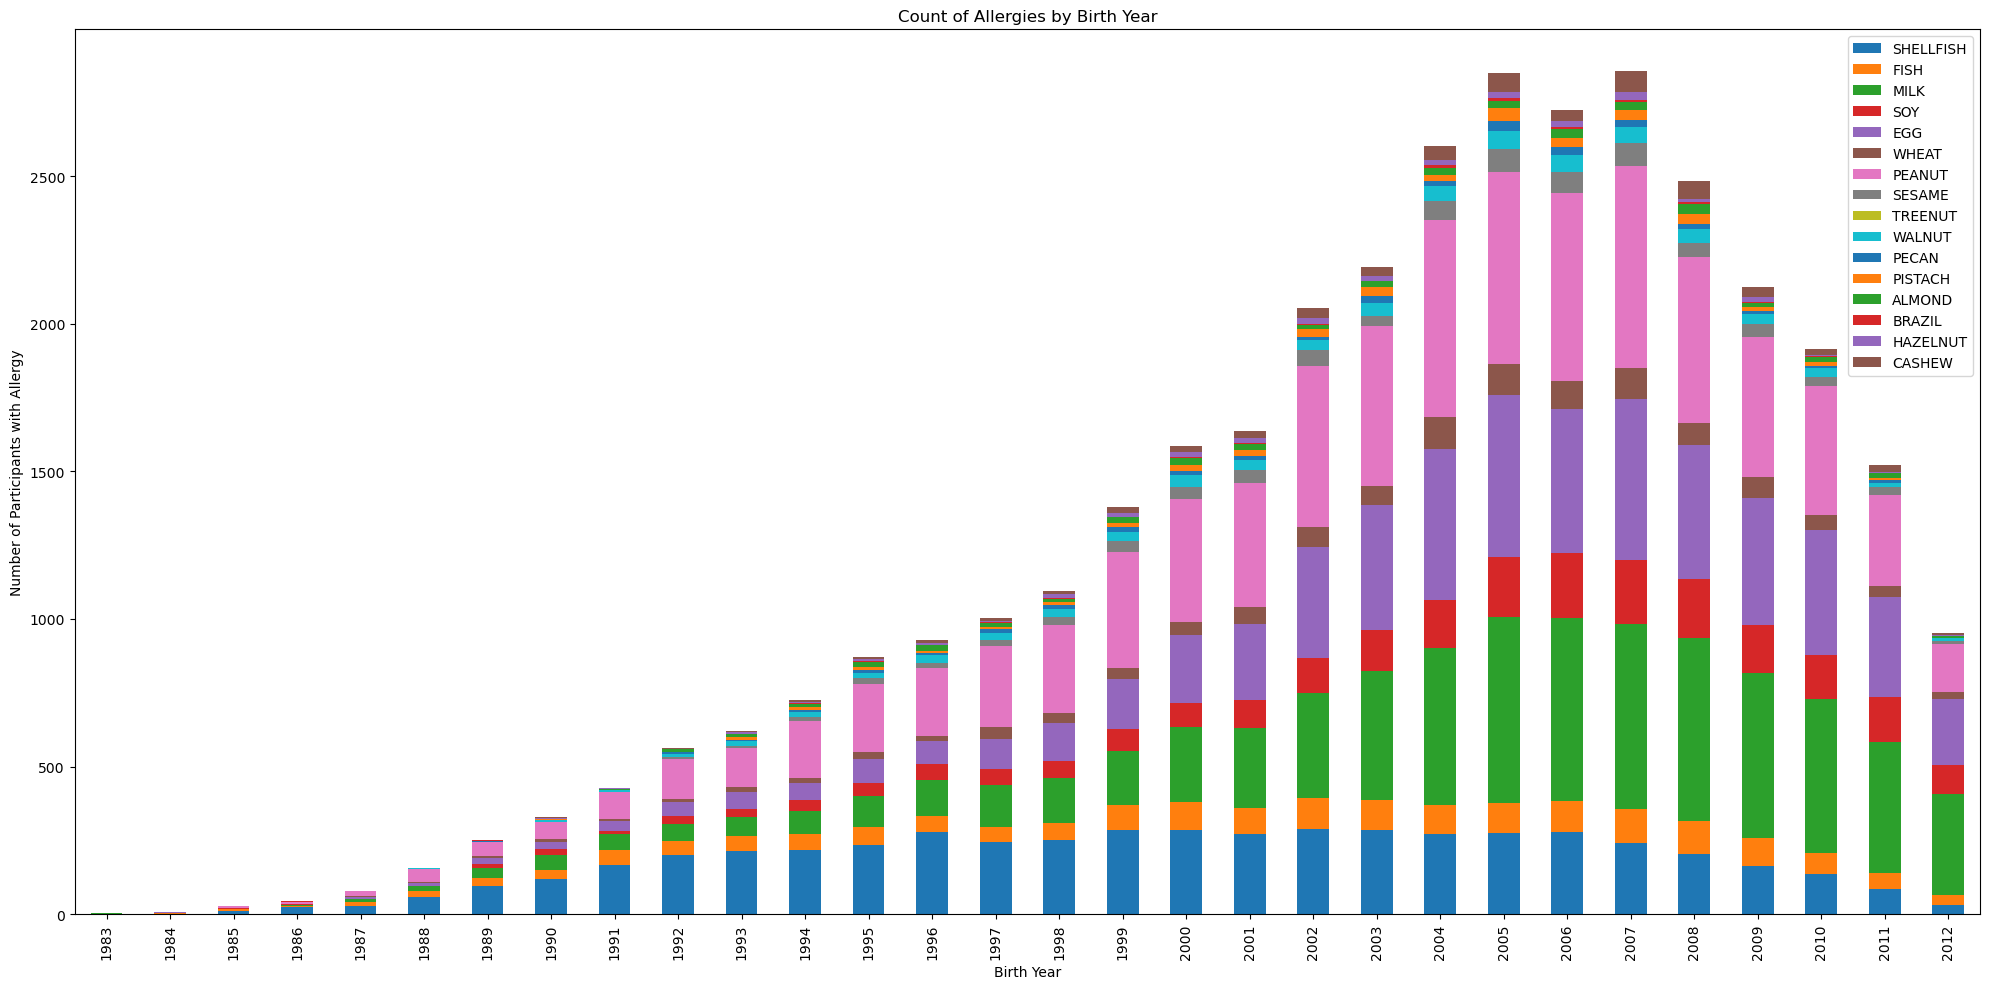

In [32]:
allergy_count_df.plot.bar(stacked=True, figsize = (20, 10))
plt.legend(labels = alg_name_list)
plt.xlabel("Birth Year")
plt.ylabel("Number of Participants with Allergy")
plt.title("Count of Allergies by Birth Year")
plt.tight_layout()
plt.savefig('output/stacked allergy by year.png')


In [116]:
#length of time in study graphed against change in asthma meds
#count of allergen kids sorted by length of time in study

allergy_df['TIME_IN_STUDY_YEARS'] = allergy_df['AGE_END_YEARS'] - allergy_df['AGE_START_YEARS']
allergy_df['CHANGE_IN_ASTHMARX'] = allergy_df['LAST_ASTHMARX'] - allergy_df['FIRST_ASTHMARX']


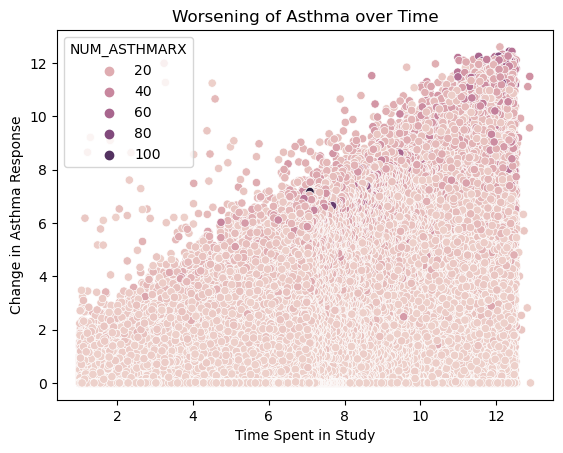

In [122]:
sns.scatterplot(data=allergy_df, x='TIME_IN_STUDY_YEARS', y='CHANGE_IN_ASTHMARX', hue='NUM_ASTHMARX')
plt.xlabel("Time Spent in Study")
plt.ylabel("Change in Asthma Response")
plt.title("Worsening of Asthma over Time")
plt.savefig("output/asthmaovertime.png")
# plt.legend("Number of Asthma Prescriptions")

In [36]:
allergy_count_df.describe()

,SHELLFISH_ALG_START,FISH_ALG_START,MILK_ALG_START,SOY_ALG_START,EGG_ALG_START,WHEAT_ALG_START,PEANUT_ALG_START,SESAME_ALG_START,TREENUT_ALG_START,WALNUT_ALG_START,PECAN_ALG_START,PISTACH_ALG_START,ALMOND_ALG_START,BRAZIL_ALG_START,HAZELNUT_ALG_START,CASHEW_ALG_START
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,174.866667,59.866667,242.966667,80.633333,202.166667,38.200000,288.433333,25.533333,0.033333,23.466667,9.500000,12.300000,12.866667,2.266667,8.433333,18.700000
std,103.223137,36.280263,230.955509,73.531360,197.143757,34.777519,231.294510,24.845361,0.182574,19.791557,8.704933,12.774301,10.257826,2.504249,7.925008,20.638347
min,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,87.250000,32.500000,52.000000,15.750000,25.250000,8.000000,64.250000,1.250000,0.000000,4.250000,2.000000,1.000000,1.250000,0.000000,1.250000,2.250000
50%,209.000000,54.500000,147.000000,56.000000,114.500000,30.000000,252.500000,20.500000,0.000000,21.000000,8.500000,8.500000,15.000000,1.500000,5.500000,10.000000
75%,272.500000,95.750000,442.000000,146.250000,412.250000,62.000000,465.000000,42.500000,0.000000,34.000000,13.750000,20.750000,19.750000,3.000000,15.000000,28.500000
max,288.000000,114.000000,629.000000,218.000000,547.000000,109.000000,684.000000,78.000000,1.000000,63.000000,33.000000,44.000000,35.000000,9.000000,25.000000,70.000000


In [37]:
total_count = allergy_df.count()['SUBJECT_ID']
    


In [38]:
milk_percentage = round(milk_count / total_count * 100, 2)

In [39]:
allergy_percentage = []
for allergy in allergy_list:
    allergy_percentage.append(round(allergy_df.groupby('BIRTH_YEAR').count()[allergy] / total_count * 100, 2))

In [40]:
allergy_percentage_df = pd.DataFrame(allergy_percentage)

In [41]:
allergy_percentage_df.head()

BIRTH_YEAR,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
SHELLFISH_ALG_START,0.0,0.0,0.0,0.01,0.01,0.02,0.03,0.04,0.05,0.06,...,0.09,0.08,0.08,0.08,0.07,0.06,0.05,0.04,0.03,0.01
FISH_ALG_START,0.0,0.0,0.0,0.00,0.00,0.01,0.01,0.01,0.02,0.01,...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.02,0.02,0.01
MILK_ALG_START,0.0,0.0,0.0,0.00,0.00,0.01,0.01,0.02,0.02,0.02,...,0.13,0.16,0.19,0.19,0.19,0.19,0.17,0.16,0.13,0.10
SOY_ALG_START,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.01,0.00,0.01,...,0.04,0.05,0.06,0.07,0.06,0.06,0.05,0.04,0.05,0.03
EGG_ALG_START,0.0,0.0,0.0,0.00,0.00,0.00,0.01,0.01,0.01,0.01,...,0.13,0.15,0.16,0.15,0.16,0.14,0.13,0.13,0.10,0.07


In [42]:
birth_year = allergy_count_df.transpose()

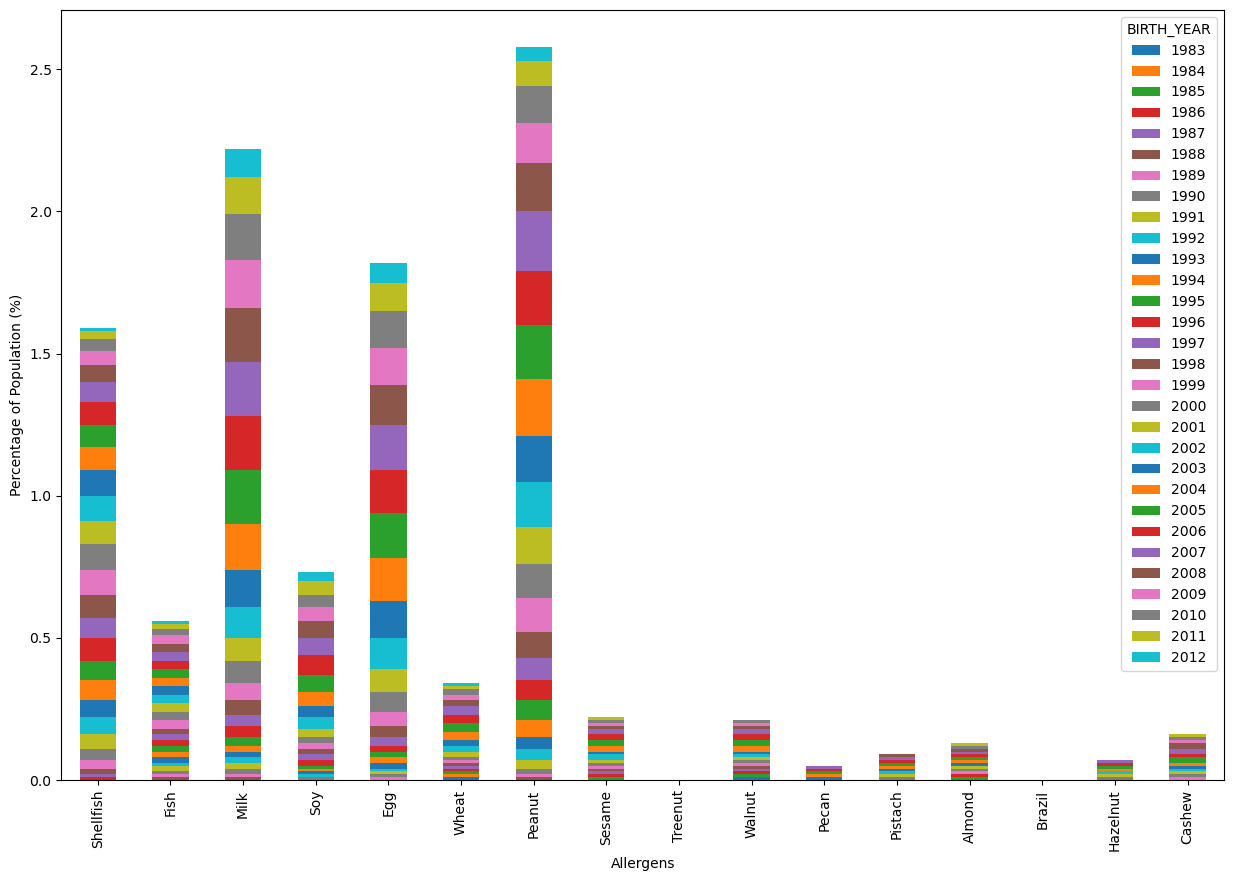

In [52]:
allergy_percentage_df.plot.bar(stacked=True, figsize = (15, 10))
plt.xticks(np.arange(0, 16), ['Shellfish', 'Fish', 'Milk', 'Soy', 'Egg', 'Wheat', 'Peanut', 'Sesame', 'Treenut', 'Walnut', 'Pecan', 'Pistach', 'Almond', 'Brazil', 'Hazelnut', 'Cashew'])
plt.xlabel("Allergens")
plt.ylabel("Percentage of Population (%)")


plt.savefig('output/horizbarchart.png')